# 5.3. Propagação direta, propagação retroativa e gráficos computacionais

- Propagação direta (Forward Propagation)
- Retropropagação (Backward propagation - more commonly called backpropagation)



# 5.3.1. Propagação direta (Forward Propagation)

A propagação direta (ou passagem direta ) refere-se ao cálculo e armazenamento de variáveis ​​intermediárias (incluindo saídas) para uma rede neural na ordem da camada de entrada para a camada de saída.

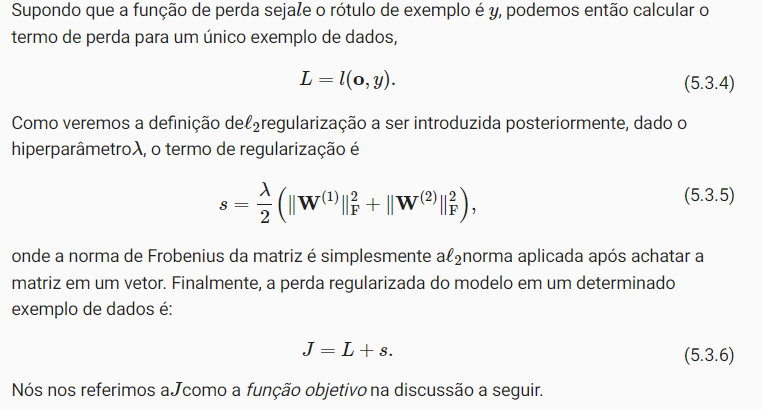



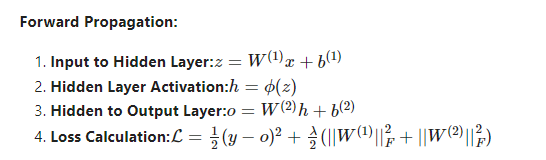

# 5.3.3. Retropropagação (Backpropagation)



A retropropagação refere-se ao método de cálculo do gradiente dos parâmetros da rede neural. Resumindo, o método percorre a rede na ordem inversa, da camada de saída para a camada de entrada, de acordo com a regra da cadeia do cálculo.

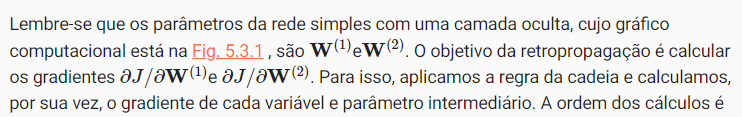



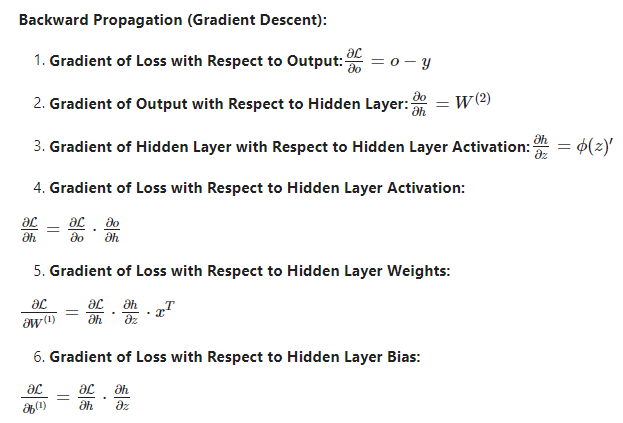

# 5.3.4. Treinamento de Redes Neurais



Ao treinar redes neurais, a propagação direta e reversa dependem uma da outra. Em particular, para propagação direta, percorremos o gráfico computacional na direção das dependências e calculamos todas as variáveis ​​em seu caminho. Eles são então usados ​​para retropropagação, onde a ordem de computação no gráfico é invertida.

Portanto, ao treinar redes neurais, uma vez inicializados os parâmetros do modelo, alternamos a propagação direta com a retropropagação, atualizando os parâmetros do modelo usando gradientes dados pela retropropagação. Observe que a retropropagação reutiliza os valores intermediários armazenados da propagação direta para evitar cálculos duplicados

Uma das consequências é que precisamos reter os valores intermediários até que a retropropagação seja concluída. Esta é também uma das razões pelas quais o treinamento requer significativamente mais memória do que a simples previsão. 

Além disso, o tamanho desses valores intermediários é aproximadamente proporcional ao número de camadas da rede e ao tamanho do lote. Assim, treinar redes mais profundas usando lotes maiores leva mais facilmente a erros de falta de memória .

# 5.3.5. Resumo

A propagação direta calcula e armazena sequencialmente variáveis intermediárias dentro do gráfico computacional definido pela rede neural. Ele procede da camada de entrada para a camada de saída. A retropropagação calcula e armazena sequencialmente os gradientes de variáveis e parâmetros intermediários dentro da rede neural na ordem inversa. Ao treinar modelos de aprendizado profundo, a propagação direta e a retropropagação são interdependentes, e o treinamento requer significativamente mais memória do que previsão.

# Exercícios

# Ex. 2

Adicione um viés à camada oculta do modelo descrito nesta seção (não é necessário incluir viés no termo de regularização).

Desenhe o gráfico computacional correspondente.

In [10]:
! pip install Graphviz

In [5]:
! pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4138 sha256=48f22d267606368ecabcfec636c7cef8c3257c519dd7c81f8af14ce260a6991a
  Stored in directory: c:\users\zeh\appdata\local\pip\cache\wheels\5a\d0\3f\b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz


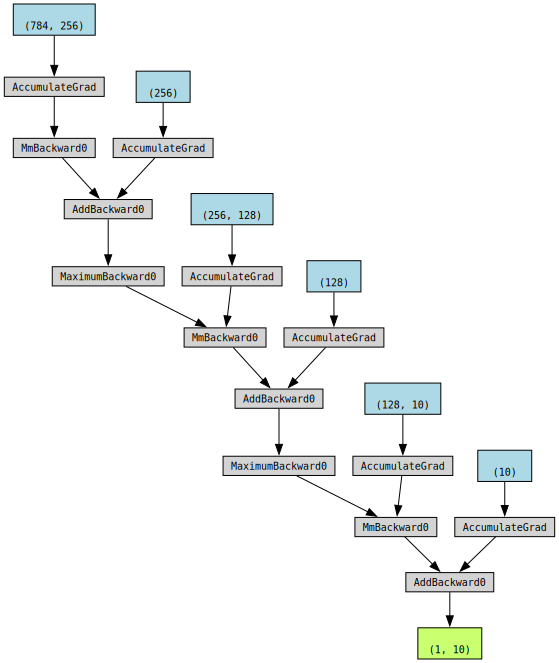

In [18]:
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
from torchviz import make_dot

import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'


import d2l
import torch
from torch import nn
from d2l import torch as d2l
import graphviz.graphs

warnings.filterwarnings('ignore')




# -----------------------------------
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

class MulMLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        bef = num_inputs
        self.W = []
        self.b = []
        for num_hidden in num_hiddens:
            self.W.append(nn.Parameter(torch.randn(bef, num_hidden) * sigma))
            self.b.append(nn.Parameter(torch.zeros(num_hidden)))
            bef = num_hidden
        self.W.append(nn.Parameter(torch.randn(bef, num_outputs) * sigma))
        self.b.append(nn.Parameter(torch.zeros(num_outputs)))

    def forward(self, X):
        H = X.reshape(-1, self.num_inputs)
        for i in range(len(self.W) - 1):
            H = relu(torch.matmul(H, self.W[i]) + self.b[i])
        return torch.matmul(H, self.W[-1]) + self.b[-1]

    def configure_optimizers(self):
        return d2l.SGD([*self.W, *self.b], self.lr)


def stat_time(model, data):
    t0 = time.time()
    trainer = d2l.Trainer(max_epochs=10, plot_flag=False)
    trainer.fit(model, data)
    return time.time() - t0


# ------------------------------------



class WeightDecayMLPScratch(MulMLPScratch):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__(num_inputs, num_outputs, num_hiddens, lr, sigma=0.01)

    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        return F.cross_entropy(y_hat, y, reduction='mean'
        if averaged else 'none') + sum([w.norm().item() for iw in self.W])


input_shape = 28 * 28
model = WeightDecayMLPScratch(num_inputs=input_shape, num_outputs=10, num_hiddens=[256, 128], lr=0.1)

x = torch.randn(1, 28 * 28)
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

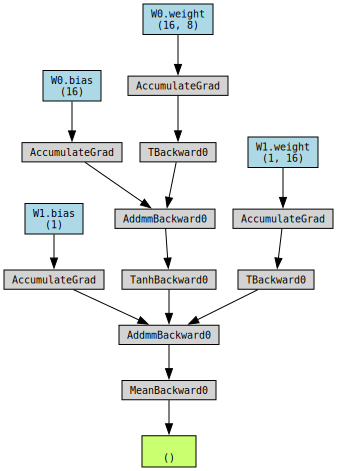

In [17]:
import graphviz.graphs
from torchviz import make_dot
import torch
from torch import nn
from d2l import torch as d2l

import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = torch.randn(1, 8)
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))



# Ex. 3

Calcule o consumo de memória para treinamento e previsão no modelo descrito nesta seção.

In [21]:
! pip install torchsummary

In [22]:
import torch
from torch import nn
from d2l import torch as d2l


class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),                 # reshape: (28 x 28) para (1 x 784)   # Flatten = Achatar
                                 nn.LazyLinear(num_hiddens),   # camada escondida. Ainda é linear.
                                 nn.ReLU(),                    # função de ativação. Converte a função em não linear.
                                 nn.LazyLinear(num_outputs))   # camada de saída



from torchsummary import summary

model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
summary(model, input_size=(1,28*28), device="cpu")



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                   [-1, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.78
Estimated Total Size (MB): 0.79
----------------------------------------------------------------


# Ex. 5. Assume that the computational graph is too large for your GPU. Can you partition it over more than one GPU? What are the advantages and disadvantages over training on a smaller minibatch?

If the computational graph of a neural network is too large to fit into a single GPU’s memory, there are a few strategies you can consider to handle this situation:

Model Parallelism: Model parallelism involves splitting the neural network across multiple GPUs, where each GPU handles a portion of the model. This is commonly used when the model itself is too large to fit into the memory of a single GPU.

Data Parallelism: Data parallelism involves dividing the training data into smaller batches and distributing those batches across multiple GPUs. Each GPU computes gradients for its batch, and the gradients are then averaged or summed across GPUs to update the model’s parameters.

Hybrid Parallelism: This approach combines both model parallelism and data parallelism, where a large model is divided among GPUs, and each GPU handles multiple batches of data.

Gradient Accumulation: If you can’t fit a large minibatch into a single GPU’s memory, you can perform gradient accumulation. This involves calculating gradients for smaller minibatches and then accumulating these gradients over multiple iterations before performing a parameter update.

Advantages of Partitioning over Multiple GPUs:

Memory Efficiency: Partitioning the model or data over multiple GPUs allows you to work with larger models or datasets that wouldn’t fit in a single GPU’s memory.
Parallelism: Training on multiple GPUs can lead to faster training times due to parallel computation.
Flexibility: You can leverage existing GPUs without needing to invest in a single large GPU.
Disadvantages of Partitioning over Multiple GPUs:

Communication Overhead: There’s a communication overhead when exchanging information (e.g., gradients) between GPUs, which can slow down training.
Synchronization Challenges: Synchronizing multiple GPUs can be complex, especially when dealing with asynchronous updates.
Code Complexity: Writing code for distributed training and handling GPU synchronization can be more challenging and error-prone.
Hardware Dependencies: This approach requires multiple GPUs, which might not be available in all environments.
Advantages of Training on a Smaller Minibatch:

Lower Memory Usage: Training on smaller minibatches reduces the memory requirements, allowing you to fit the model and data on a single GPU.
More Frequent Updates: Smaller minibatches lead to more frequent updates, which can help the model converge faster.
Less Communication Overhead: When working with a single GPU, you don’t have the communication overhead associated with distributing computations over multiple GPUs.
Disadvantages of Training on a Smaller Minibatch:

Slower Convergence: Smaller minibatches can lead to more noisy gradient estimates, slowing down convergence.
Possibility of Overfitting: Training on smaller minibatches might result in overfitting, as the model doesn’t see a diverse range of examples in each update.
Ultimately, the choice between partitioning over multiple GPUs and training on a smaller minibatch depends on your hardware resources, computational requirements, and the specific characteristics of your problem. It’s important to carefully consider the trade-offs and experiment to find the best approach for your situation.